# Build a model to detect language based on the text.





# Objective: -
As a human, you can easily detect the languages you know. For example, I can easily identify Hindi and English, but being an Indian, it is also not possible for me to identify all Indian languages. This is where the language identification task can be used. Google Translate is one of the most popular language translators in the world which is used by so many people around the world. It also includes a machine learning model to detect languages that you can use if you don’t know which language you want to translate.

The goal of this challenge is to build a machine learning model that detect the language based on text. 


# Dataset: -

The dataset is openly available at Kaggle.

**Two real-valued features are computed for each cell nucleus:**

1. Text
2. Language

# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

In [260]:
#Loading libraries 
import pandas as pd
import seaborn as sns
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.naive_bayes import BernoulliNB
import warnings

warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


In this stage we are going to read our problem dataset and have a look on it.

In [261]:
#loading the dataset
try:
    df = pd.read_csv('C:/My Sample Notebook/Notebook Template/Language Detection/data/language.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [262]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

**Why we drop column?**

Axis are defined for arrays with more than one dimension. A 2-dimensional array has two corresponding axes: the first running vertically downwards across rows (axis 0) 
and the second running horizontally across columns (axis 1).

After we read the data, we can look at the data using:

In [263]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 22000 rows and 2 columns


#### By analysing the problem statement and the dataset, we get to know that the target variable is "CLASS" column.

In [264]:
df['language'].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [265]:
df.shape

(22000, 2)

#### The df.shape method shows the shape of the dataset. 

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [267]:
df.iloc[1]

Text        sebes joseph pereira thomas  på eng the jesuit...
language                                              Swedish
Name: 1, dtype: object

####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [268]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [269]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  2
There names are as follows:  ['Text', 'language']


In [270]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [271]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  0
There names are as follows:  []


In [272]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [273]:
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  0
There name are as follow:  []


## Step 2 Insights: -

1) We have total 2 features where both are categorical type.


After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.

# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness

In [274]:
df.describe()

,Text,language
count,22000,22000
unique,21859,22
top,haec commentatio automatice praeparata res ast...,Estonian
freq,48,1000


#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. 

# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# Null and Nan values

1. **Null Values**


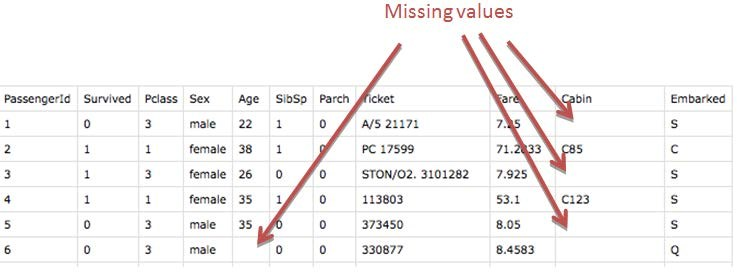

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [275]:
df.isnull().sum()

Text        0
language    0
dtype: int64

As we notice that there are no null values in our dataset.

2. **Nan Values**

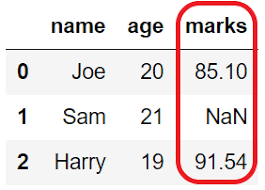

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [276]:
df.isna().sum()

Text        0
language    0
dtype: int64

As we notice that there are no nan values in our dataset.

#### Another way to remove null and nan values is to use the method "df.dropna(inplace=True)". 

In [277]:
df['language']

0        Estonian
1         Swedish
2            Thai
3           Tamil
4           Dutch
           ...   
21995      French
21996        Thai
21997     Spanish
21998     Chinese
21999    Romanian
Name: language, Length: 22000, dtype: object

### Step 3 Insights: - 

With the statistical analysis we have found that the data have a lot of skewness in them all the columns are positively skewed with mostly zero variance.

Statistical analysis is little difficult to understand at one glance so to make it more understandable we will perform visulatization on the data which will help us to understand the process easily.

### Why we are calculating all these metrics? 

Mean / Median /Mode/ Variance /Standard Deviation are all very basic but very important concept of statistics used in data science. Almost all the machine learning algorithm uses these concepts in data preprocessing steps. These concepts are part of descriptive statistics where we basically used to describe and understand the data for features in Machine learning

<AxesSubplot: xlabel='language', ylabel='count'>

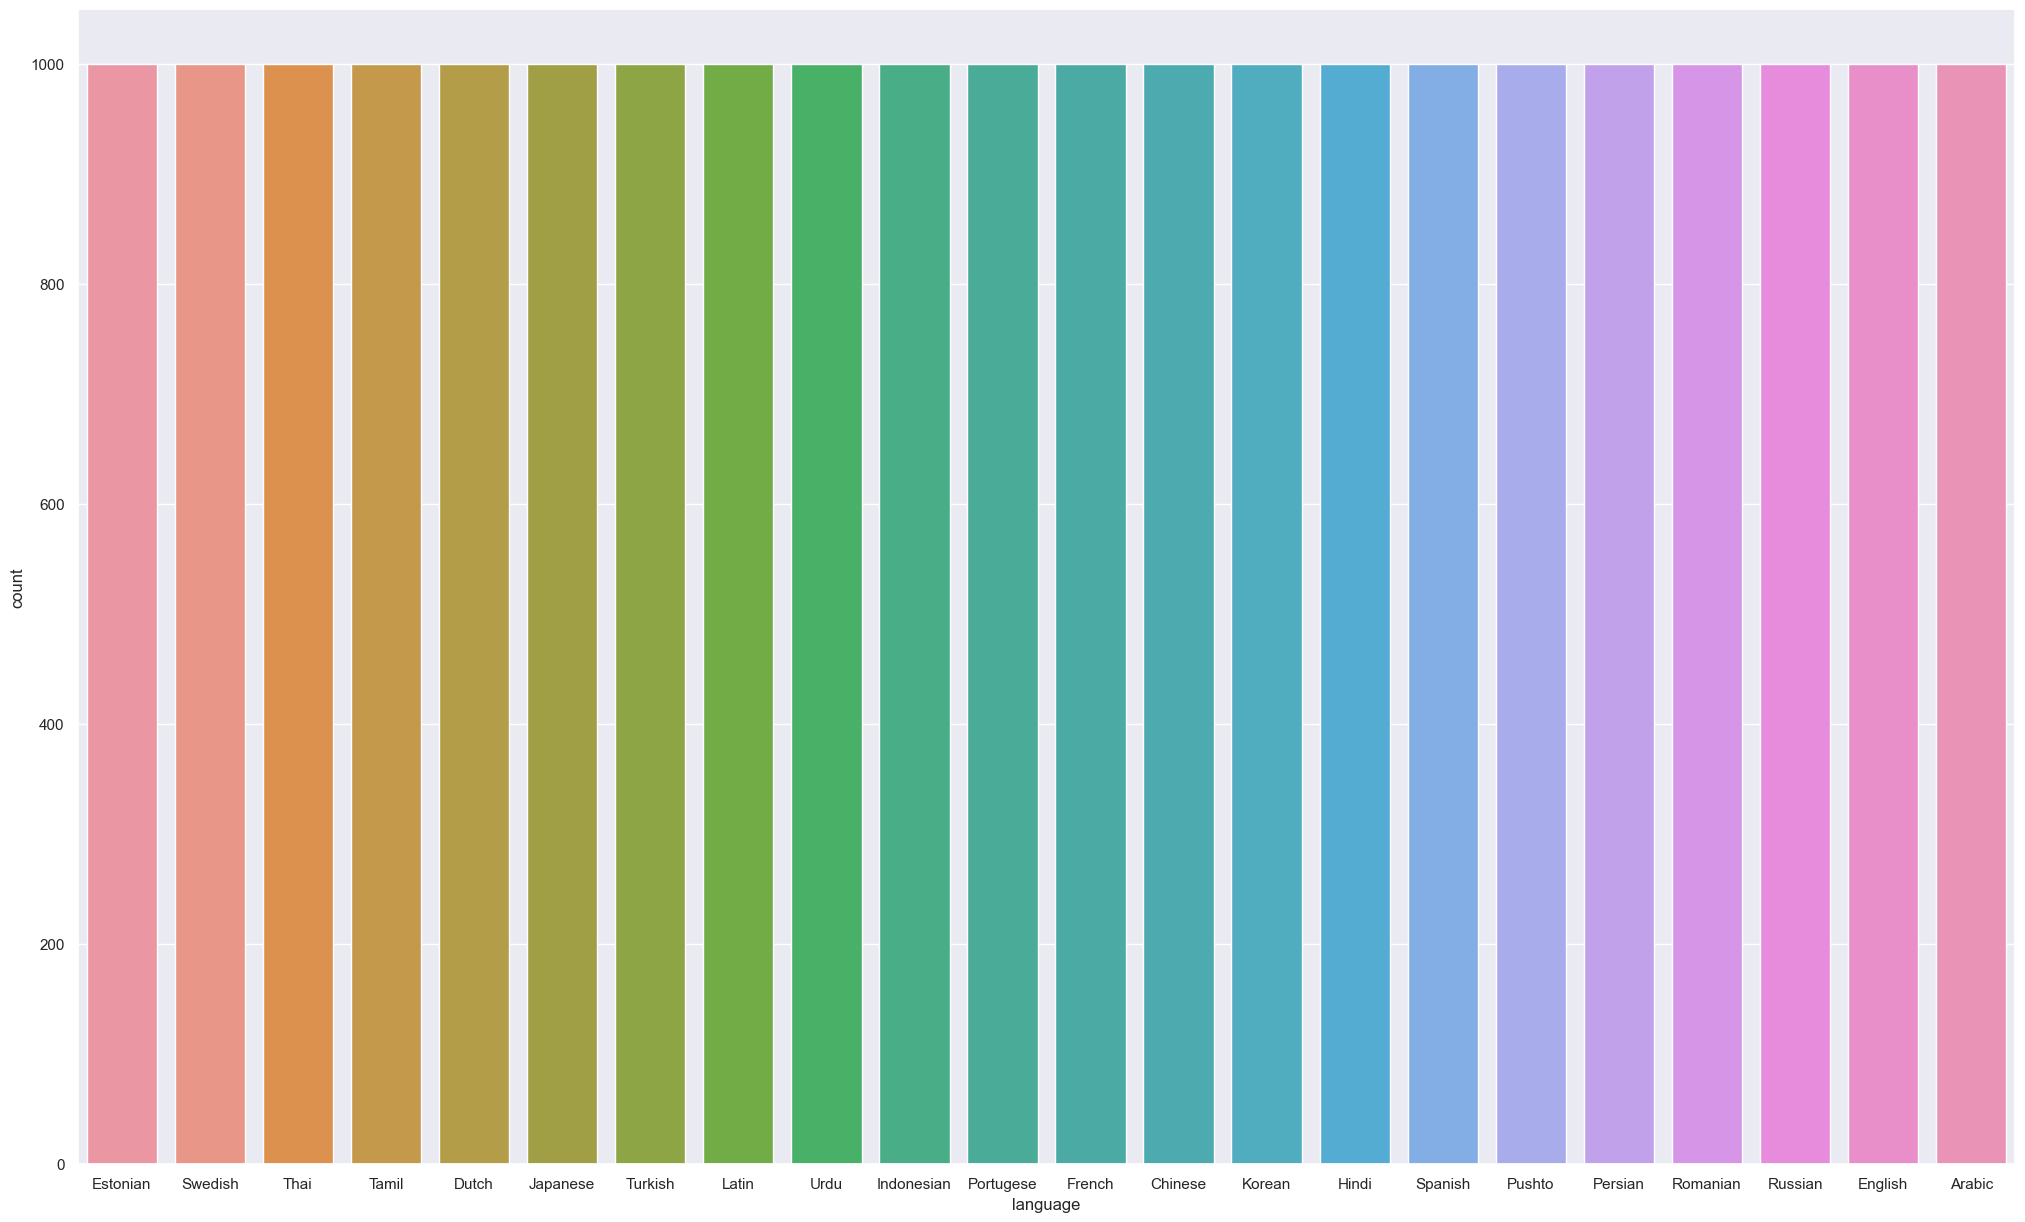

In [278]:
sns.set(rc={'figure.figsize':(25,15)})
sns.countplot(x = df['language'])

### As per the above graph we have total 22 different languages.

# Step 4: Data Exploration
**Goal/Purpose:**

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns

# 1. Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column


### Histogram Insight: -

Histogram helps in identifying the following:
- View the shape of your data set’s distribution to look for outliers or other significant data points.

- Determine whether something significant has boccurred from one time period to another.

### Why Histogram? 

It is used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

From the above graphical representation we can identify that the highest bar represents the outliers which is above the maximum range.

We can also identify that the values are moving on the right side, which determines positive and the centered values determines normal skewness.

# All categorical column so can't plot Histogram.

# 2. Distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

### Distplot Insights: -

Above is the distrution bar graphs to confirm about the statistics of the data about the skewness, the above results are:

2. 1 column i.e label which is our target variable ~ which is also +ve skewed. In that case we'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables

### Why Distplot?
Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

We can observe that the bell curve is shifted to left we indicates positive skewness.As all the column are positively skewed we don't need to do scaling.

Let's proceed and check the distribution of the target variable.


# All categorical column so can't plot Distplot.

# 3. Heatmap




A heatmap (or heat map) is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance 

__Correlation__ - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation



### Heatmap insights: -

As we know, it is recommended to avoid correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, hence increasing the risk of errors.




### Why Heatmap?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

# All categorical column so can't plot Heatmap.

# 4. Boxplot

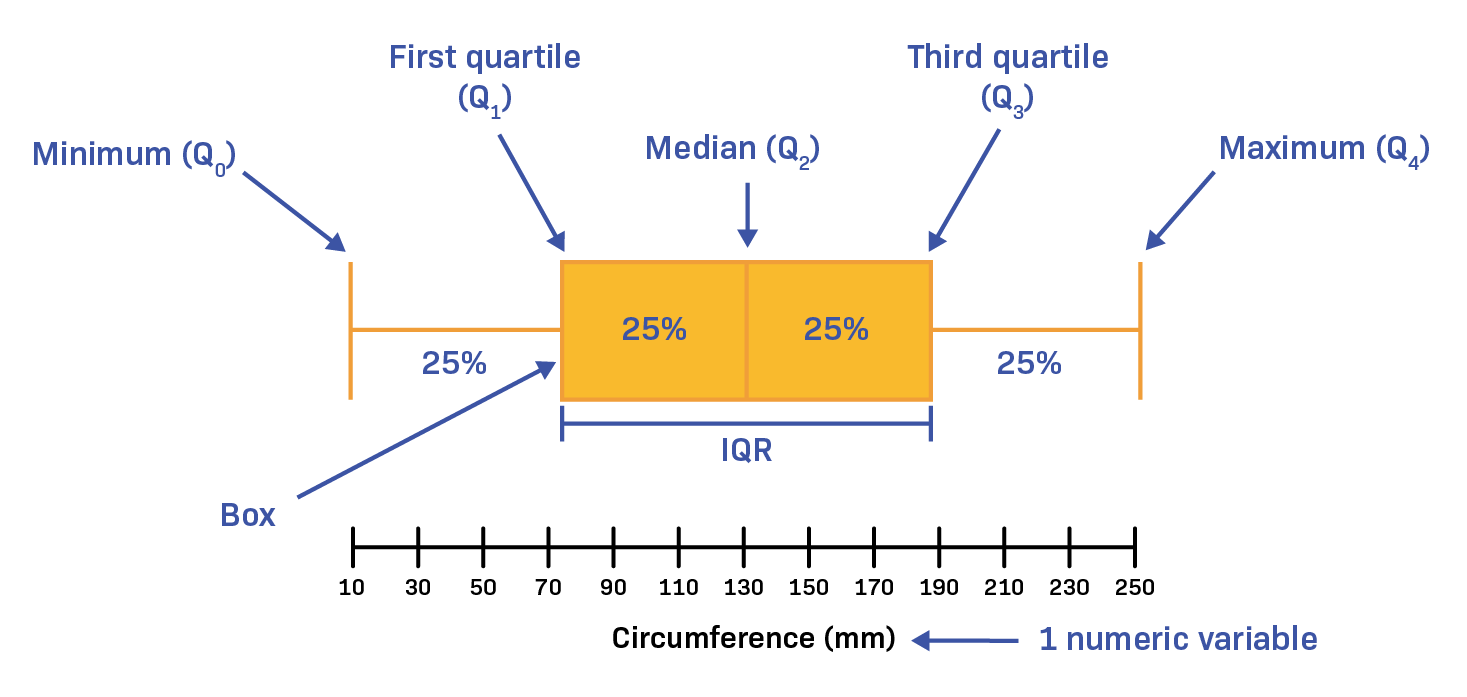

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).

Basically, to find the outlier in a dataset/column.

#### The dark points are known as Outliers. Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

### Boxplot Insights: - 
- Sometimes outliers may be an error in the data and should be removed. In this case these points are correct readings yet they are different from the other points that they appear to be incorrect.

- The best way to decide wether to remove them or not is to train models with and without these data points and compare their validation accuracy.

- So we will keep it unchanged as it won't affect our model.

Here, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one. Hence, for now we'll leave them as is and let our algorithm deal with them. As we know, tree-based algorithms are usually robust to outliers.

### Why Boxplot?
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.



In the next step we will divide our cleaned data into training data and testing data.

### As the problem is based on Natural Language Processing so data visualization isn't needed because majority columns are categorical.

We only need the content and class column from the dataset for the rest of the task. So let’s select both the columns and move further:

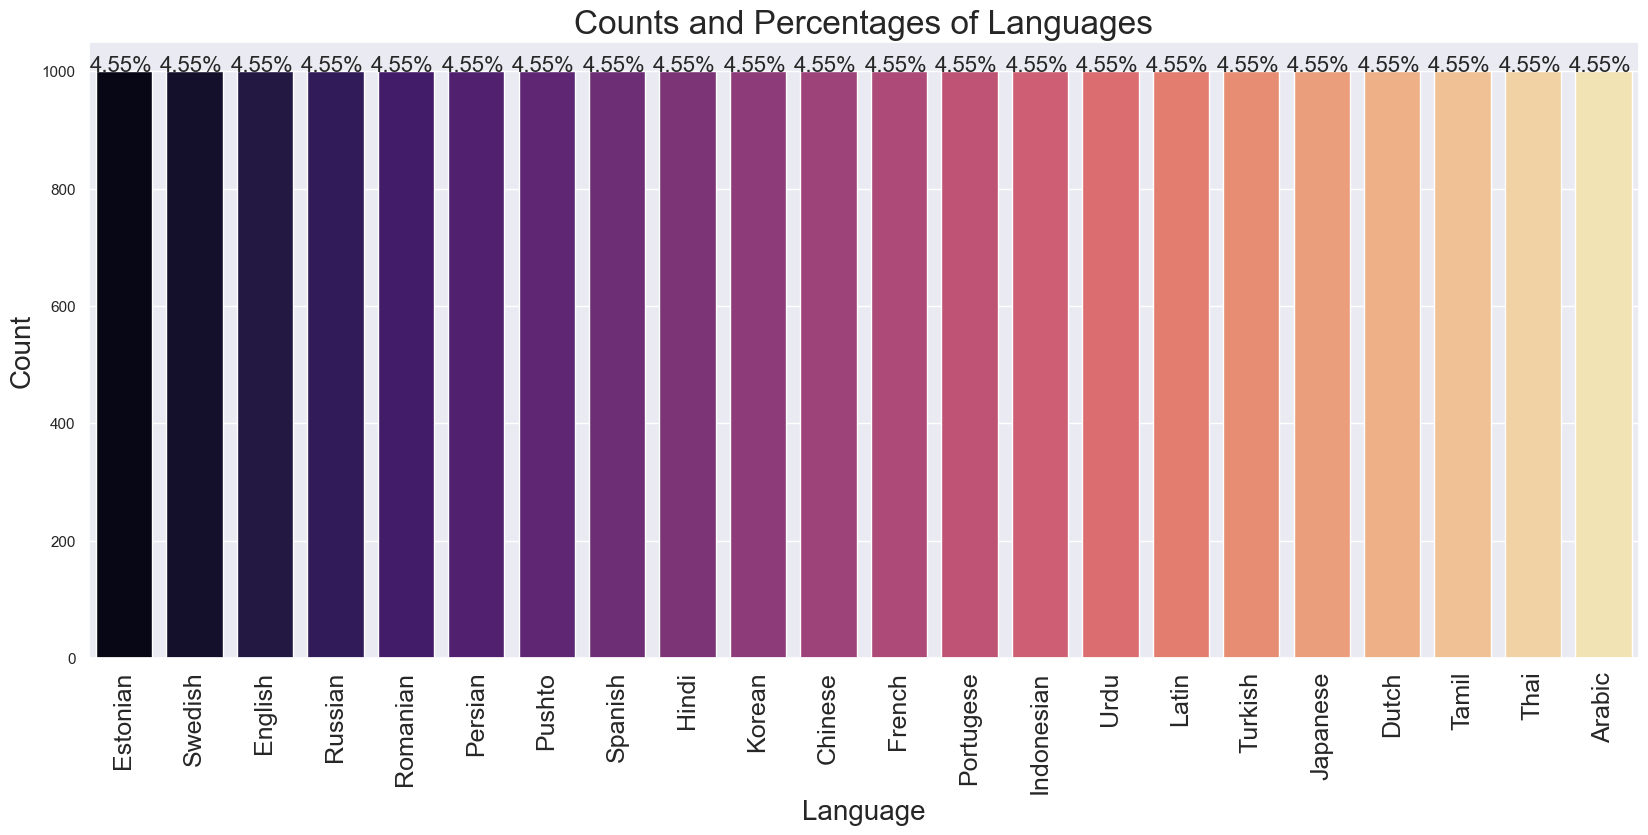

In [279]:
plt.figure(figsize=(20,8))

total= float(len(df['language']))
ax= sns.countplot(x= 'language', data= df, order= df['language'].value_counts().index, palette= 'magma')

for p in ax.patches:
    percentage= '{:.2f}%'.format(100 * p.get_height()/total)
    x= p.get_x() + p.get_width()
    y= p.get_height()
    ax.annotate(percentage, (x, y), fontsize=16, ha="right")
    
plt.title('Counts and Percentages of Languages', fontsize=24)
plt.xlabel("Language",fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(size= 18, rotation=90) 
plt.show()

In [280]:
language= df['language'].value_counts().reset_index()
language

,index,language
0,Estonian,1000
1,Swedish,1000
2,English,1000
3,Russian,1000
4,Romanian,1000
5,Persian,1000
6,Pushto,1000
7,Spanish,1000
8,Hindi,1000
9,Korean,1000


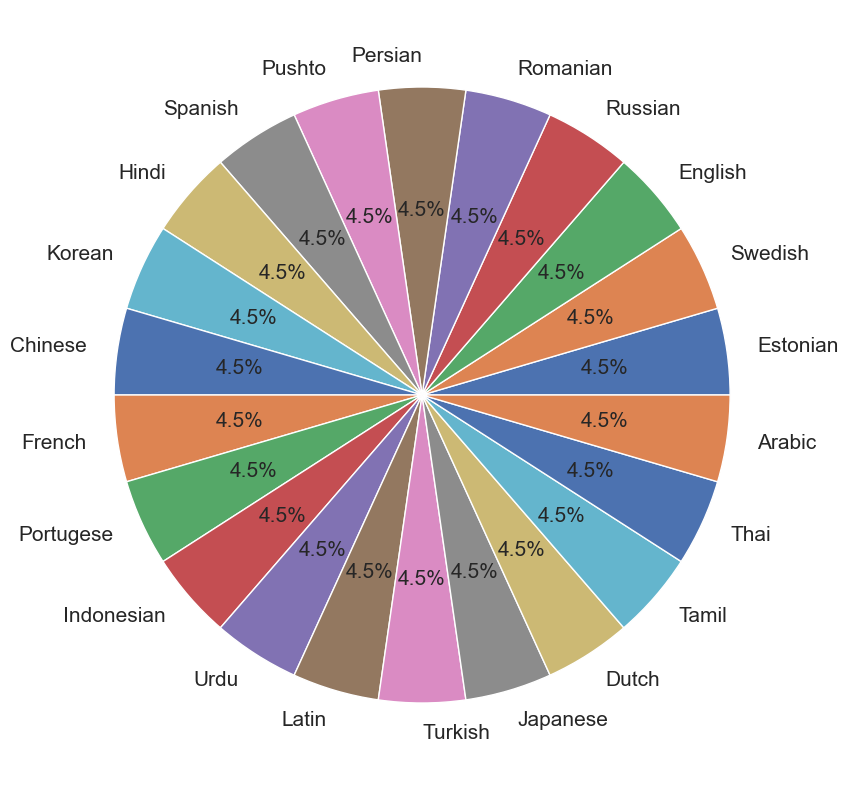

In [281]:
plt.figure(figsize=(10,10))

#create pie chart
labels= language['index']

plt.pie(language["language"], labels= labels, autopct='%.1f%%', textprops={'fontsize': 15})

plt.show()

# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

1. Now we will spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset.
3. Scaling on train dataset.

**1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.**

In [282]:
# Separate target and feature column in X and y variable
# X will be the features
X = np.array(df["Text"]) 
#y will be the target variable
y = np.array(df["language"])

In [283]:
X

array(['klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald',
       'sebes joseph pereira thomas  på eng the jesuits and the sino-russian treaty of nerchinsk  the diary of thomas pereira bibliotheca instituti historici s i --   rome libris ',
       'ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร และเขตบางคอแหลม',
       ...,
       'con motivo de la celebración del septuagésimoquinto ° aniversario de la fundación del departamento en  guillermo ceballos espinosa presentó a la gobernación de caldas por encargo de su t

In [284]:
y

array(['Estonian', 'Swedish', 'Thai', ..., 'Spanish', 'Chinese',
       'Romanian'], dtype=object)

In [285]:
# Check the shape of X and y variable
X.shape, y.shape

((22000,), (22000,))

#### Machines cannot understand characters and words. So when dealing with text data we need to represent it in numbers to be understood by the machine. Countvectorizer is a method to convert text to numerical data. To show you how it works let’s take an example:

text = [‘Hello my name is james, this is my python notebook’]

The text is transformed to a sparse matrix as shown below.

- Hello is james my name notebook python this

- 1      2  1    2  1     1       1      1

In [286]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()
X = count_vec.fit_transform(X)

#### With CountVectorizer we are converting raw text to a numerical vector representation of words and n-grams. This makes it easy to directly use this representation as features (signals) in Machine Learning tasks such as for text classification and clustering.

#### 2. Spliting the dataset in training and testing data. 

*Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training part and 20% goes into testing  part.*

In [287]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [288]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17600, 277720), (4400, 277720), (17600,), (4400,))

### Insights: -

Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In the next step we will train our model on the basis of our training and testing data.

# Step 3: Model Training

#### Goal:
In this step we are going to train our dataset on different classification algorithms. As we know that our target variable is in discrete format so we have to apply classification algorithm. Target variable is a category like filtering.In our dataset we have the outcome variable or Dependent variable i.e Y having only two set of values, either 1 (Spam) or 0(Not Spam). So we will use Classification algorithm**

__Algorithms we are going to use in this step__

1. Bernoulli Naive Bayes
2. Linear SVC
3. Multinomial Naive Bayes

K-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset. There are commonly used variations on cross-validation, such as stratified and repeated, that are available in scikit-learn

In [289]:
# Define kfold with 10 split
cv1 = KFold(n_splits=10, shuffle=True, random_state=42)

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

# 1. Bernoulli Naive Bayes

Naive Bayes is a supervised machine learning algorithm to predict the probability of different classes based on numerous attributes. It indicates the likelihood of occurrence of an event. Naive Bayes is also known as conditional probability.

Bernoulli Naive Bayes is a part of the Naive Bayes family. It is based on the Bernoulli Distribution and accepts only binary values, i.e., 0 or 1. If the features of the dataset are binary, then we can assume that Bernoulli Naive Bayes is the algorithm to be used.

#### Train set cross-validation 

In [290]:
#Using Bernoulli Naive Bayes algorithm to the Training Set
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train, y_train)


BernoulliNB()

In [291]:
#Accuracy check of trainig data

#Get R2 score
model.score(X_train, y_train)


0.9618181818181818

In [292]:
#Accuracy of test data
model.score(X_test, y_test) 

0.8968181818181818

### Prediction 

Now we will perform prediction on the dataset using Logistic Regression.

In [293]:
# Predict the values on X_test_scaled dataset 
y_predicted = model.predict(X_test)

## Various parameters are calculated for analysing the predictions.

1) Confusion Matrix
2)Classification Report
3)Accuracy Score
4)Precision Score
5)Recall Score
6)F1 Score

## Confusion Matrix

A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

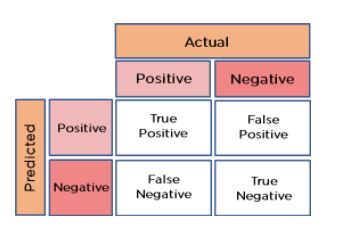

#### This diagram helps in understanding the concept of confusion matrix. 

In [294]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [295]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(154.75, 0.5, 'True Class')

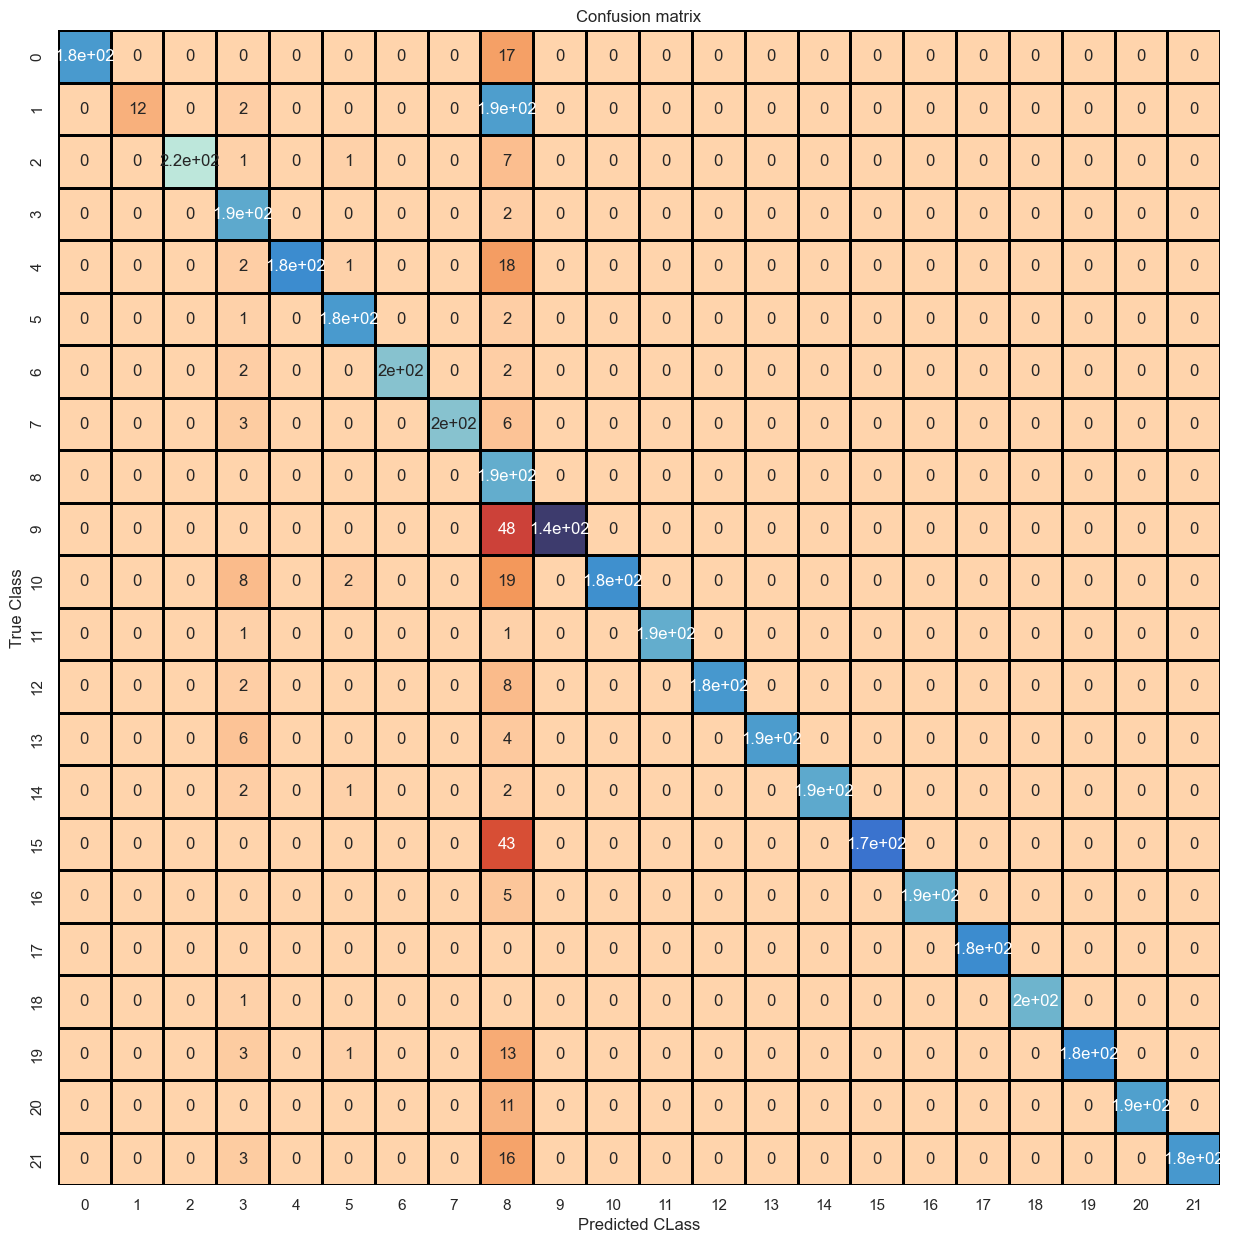

In [296]:
#We are creating Confusion Matrix on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(cm,cmap = 'icefire_r', annot = True, cbar=False, linecolor='Black', linewidth = 2)

plt.title("Confusion matrix")

plt.xlabel('Predicted CLass')
plt.ylabel('True Class')


<AxesSubplot: >

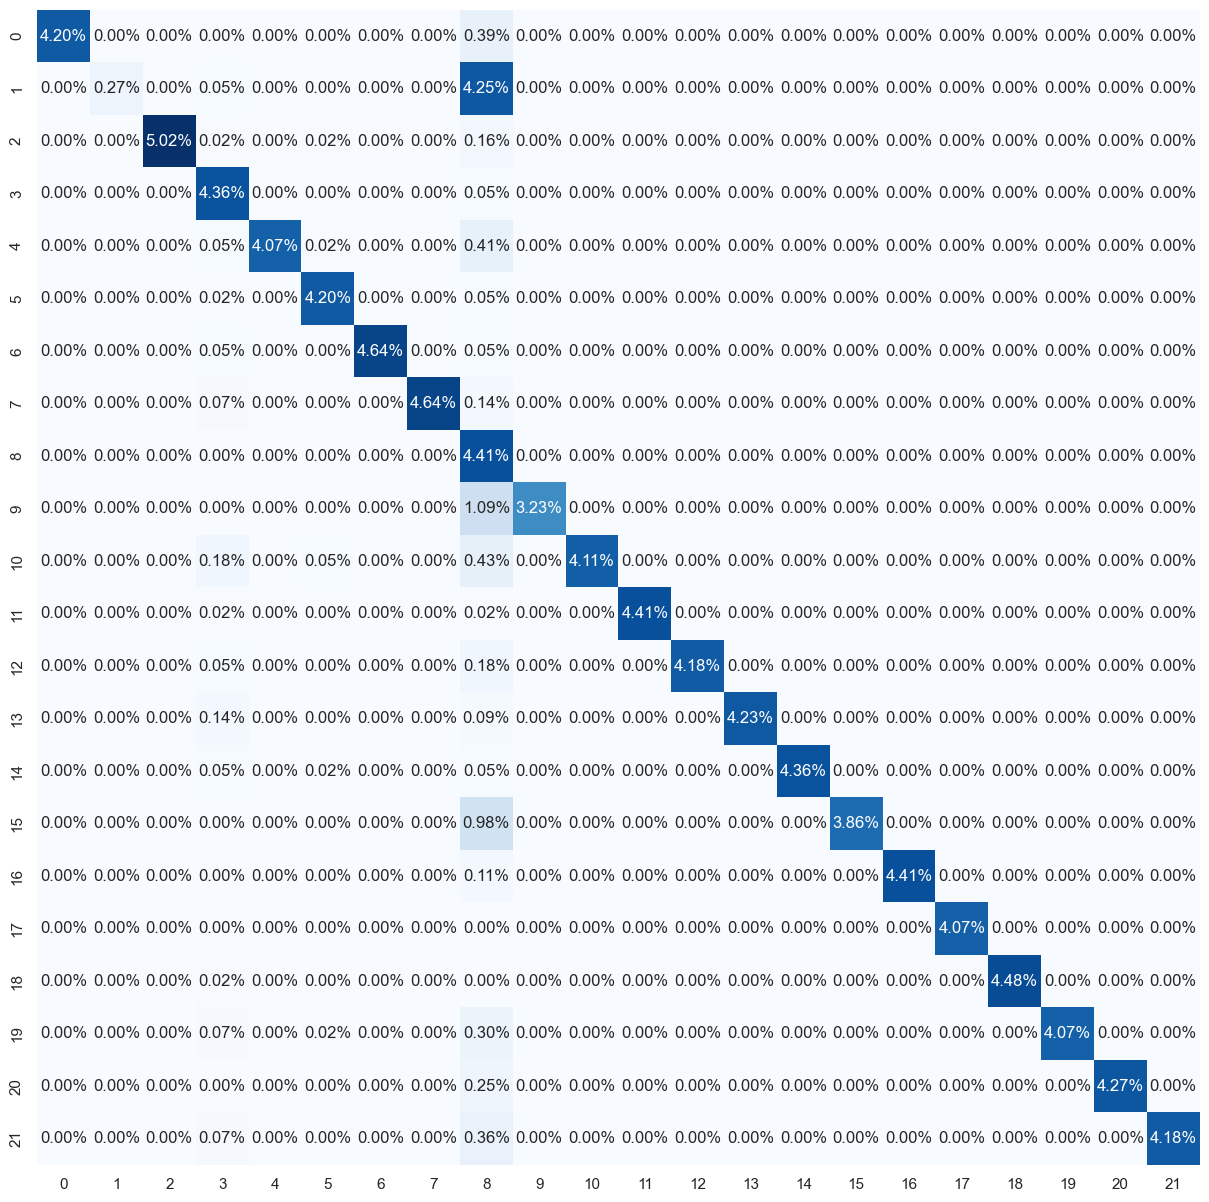

In [297]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

## Evaluating all kinds of evaluating parameters. 

#### Classification Report :
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. 

#### F1_score :
The F1 score is a machine learning metric that can be used in classification models. 

#### Precision_score :
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

#### Recall_score :
Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. Precision-Recall score is a useful measure of success of prediction when the classes are very imbalanced.

In [298]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is  Bernoulli Naive Bayes")
  
l_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(l_acc))
  
prec = precision_score(y_test, y_predicted,average='micro')
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted,average='micro')
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted,average='micro')
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)

The model used is  Bernoulli Naive Bayes

The accuracy is: 0.8968181818181818
The precision is: 0.8968181818181818
The recall is: 0.8968181818181818
The F1-Score is: 0.8968181818181818
Classification Report is:

              precision    recall  f1-score   support

      Arabic       1.00      0.92      0.96       202
     Chinese       1.00      0.06      0.11       201
       Dutch       1.00      0.96      0.98       230
     English       0.84      0.99      0.91       194
    Estonian       1.00      0.90      0.94       200
      French       0.97      0.98      0.98       188
       Hindi       1.00      0.98      0.99       208
  Indonesian       1.00      0.96      0.98       213
    Japanese       0.32      1.00      0.49       194
      Korean       1.00      0.75      0.86       190
       Latin       1.00      0.86      0.93       210
     Persian       1.00      0.99      0.99       196
   Portugese       1.00      0.95      0.97       194
      Pushto       1.00      0.

# 2. Linear SVC

The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is. This makes this specific algorithm rather suitable for our uses, though you can use this for many situations.

In [299]:
#Using LinearSVC
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train, y_train)

LinearSVC()

In [300]:
#Accuracy check of trainig data
#Get R2 score
classifier.score(X_train, y_train)

0.9999431818181819

In [301]:
#Accuracy of test data
classifier.score(X_test, y_test) 

0.9572727272727273

### Prediction

In [302]:
# Predict the values on X_test_scaled dataset 
y_predicted = classifier.predict(X_test)

In [303]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [304]:
#Confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(154.75, 0.5, 'True Class')

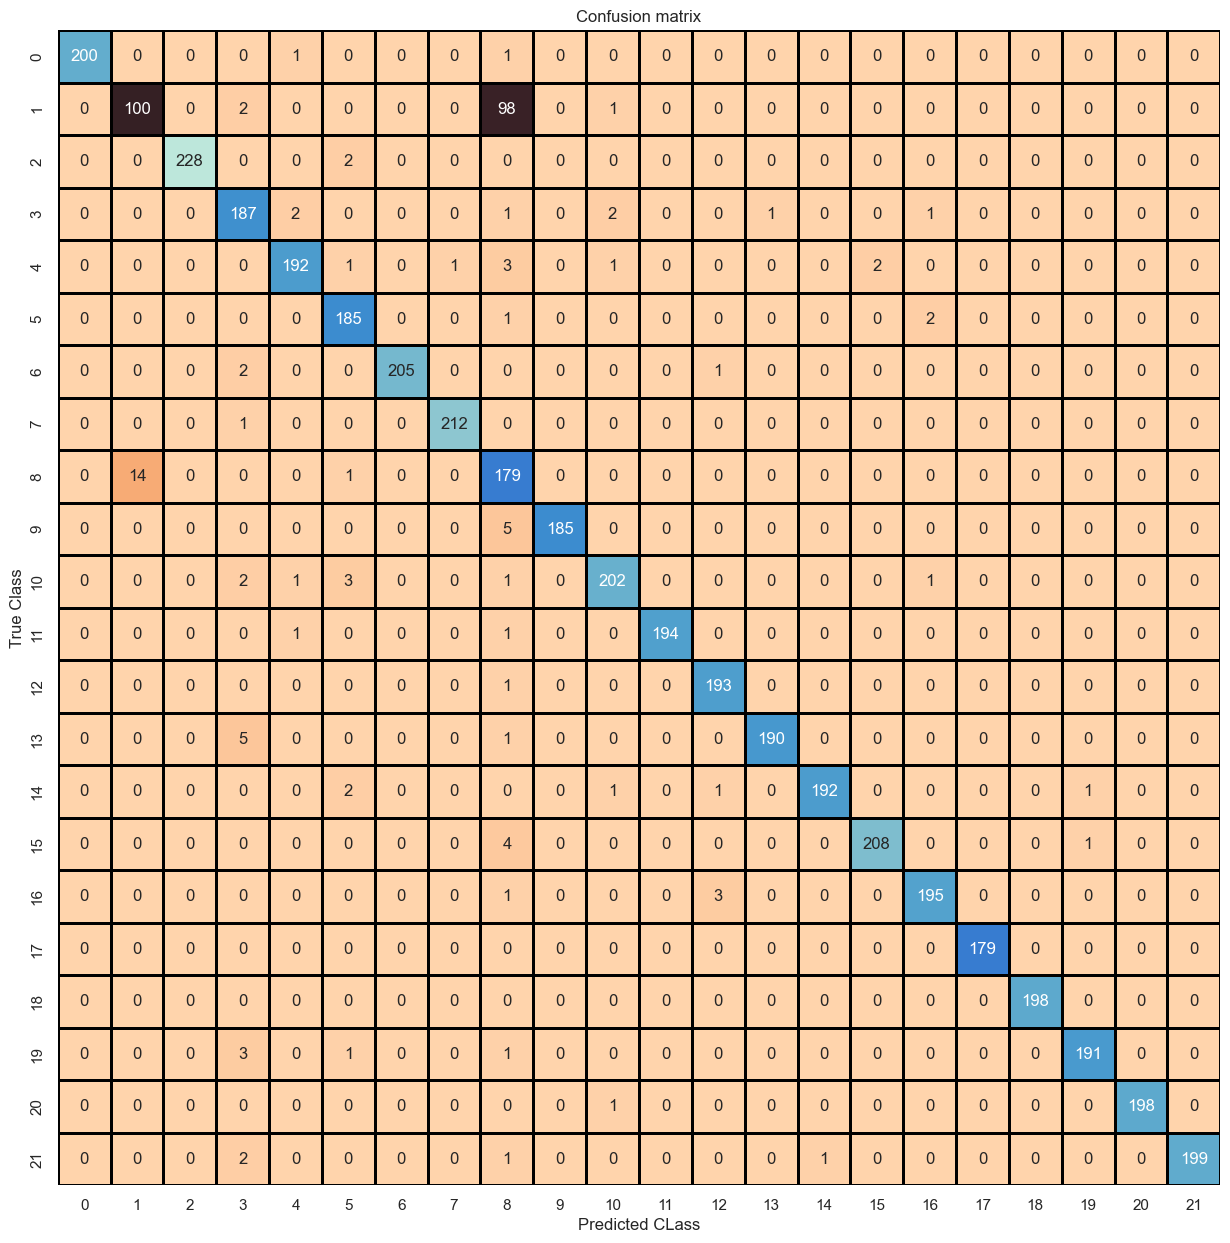

In [305]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")

plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot: >

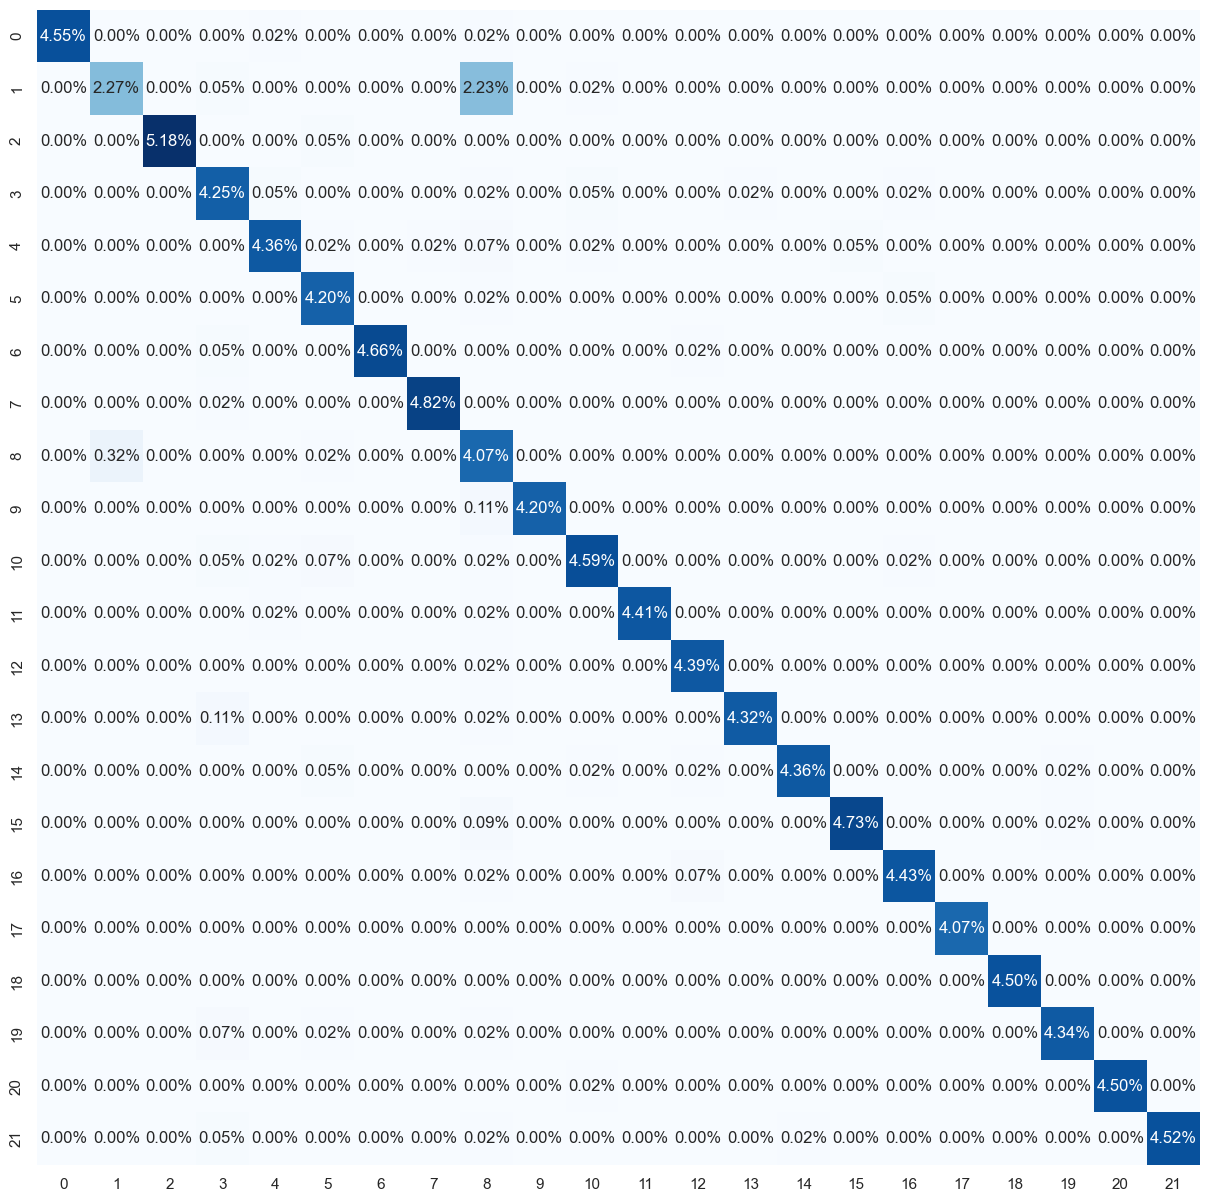

In [306]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

### Evaluating all kinds of evaluating parameters. 

In [307]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is LinearSVC")
  
k_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(k_acc))
  
prec = precision_score(y_test, y_predicted,average="micro")
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted,average='micro')
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted,average='micro')
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)    

The model used is LinearSVC

The accuracy is: 0.9572727272727273
The precision is: 0.9572727272727273
The recall is: 0.9572727272727273
The F1-Score is: 0.9572727272727273
Classification Report is:

              precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       202
     Chinese       0.88      0.50      0.63       201
       Dutch       1.00      0.99      1.00       230
     English       0.92      0.96      0.94       194
    Estonian       0.97      0.96      0.97       200
      French       0.95      0.98      0.97       188
       Hindi       1.00      0.99      0.99       208
  Indonesian       1.00      1.00      1.00       213
    Japanese       0.60      0.92      0.73       194
      Korean       1.00      0.97      0.99       190
       Latin       0.97      0.96      0.97       210
     Persian       1.00      0.99      0.99       196
   Portugese       0.97      0.99      0.98       194
      Pushto       0.99      0.97      0.98 

# 3. Multinomial Naive Bayes

The Multinomial Naive Bayes algorithm is a Bayesian learning approach popular in Natural Language Processing (NLP). The program guesses the tag of a text, such as an email or a newspaper story, using the Bayes theorem. It calculates each tag's likelihood for a given sample and outputs the tag with the greatest chance

In [308]:
#Using  Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB

clas = MultinomialNB()
clas.fit(X_train, y_train)


MultinomialNB()

In [309]:
#Accuracy check of trainig data
#Get R2 score
clas.score(X_train, y_train)

0.9838636363636364

In [310]:
#Accuracy of test data
clas.score(X_test, y_test) 

0.9529545454545455

### Prediction 

In [311]:
# predict the values on X_test_scaled dataset 
y_predicted = clas.predict(X_test)

In [312]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [313]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(154.75, 0.5, 'True Class')

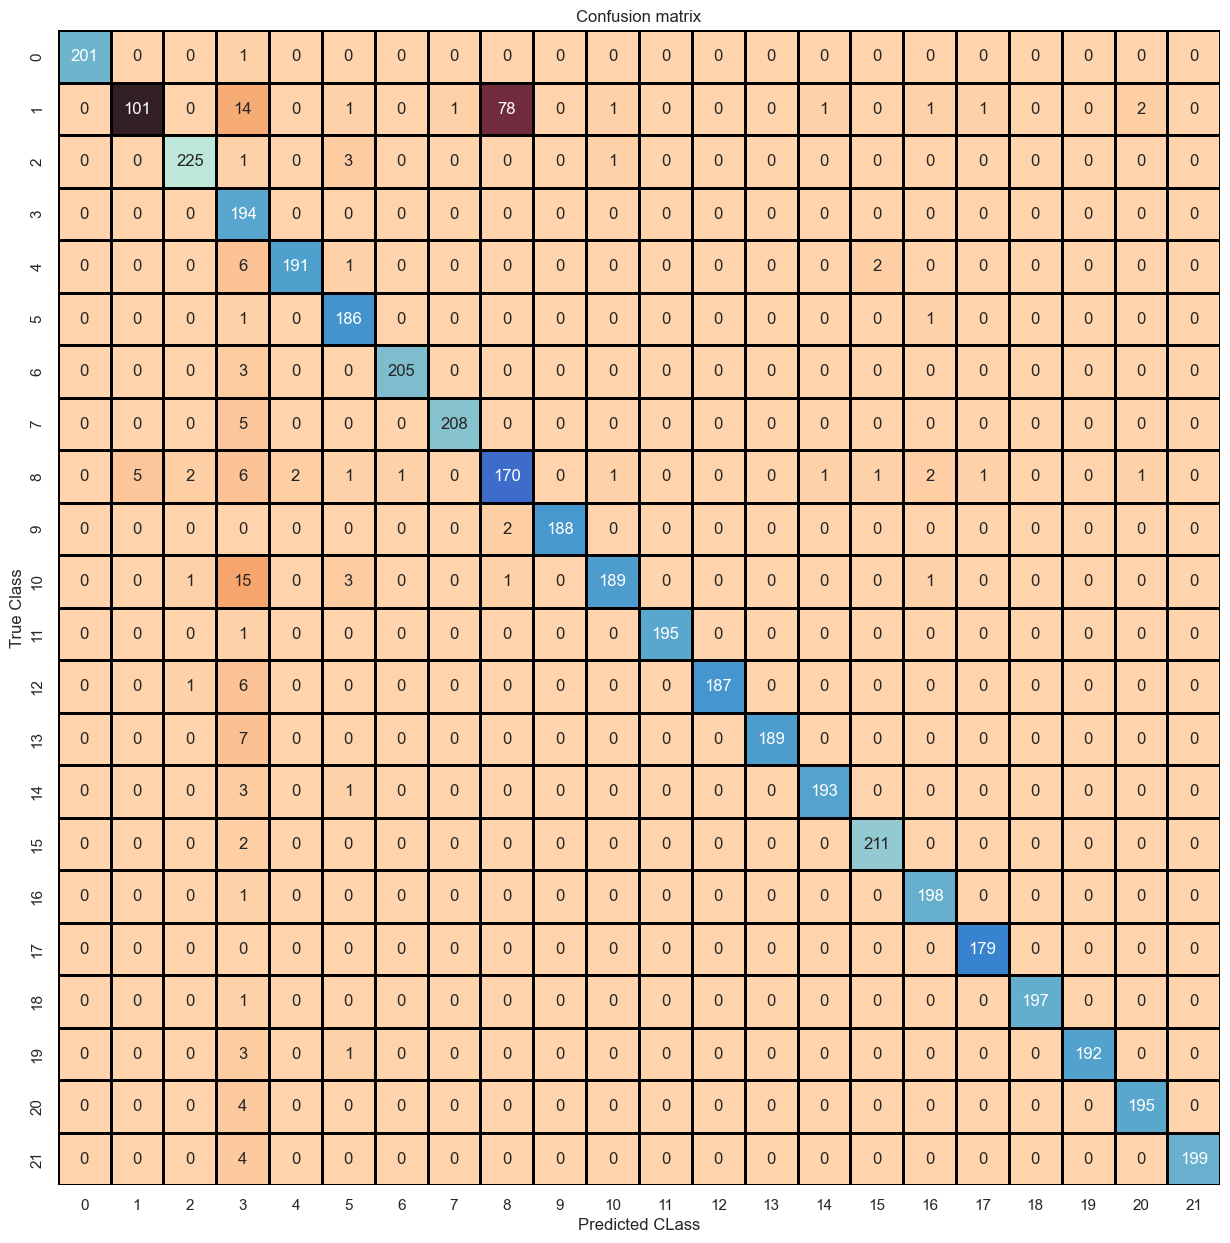

In [314]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")

plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot: >

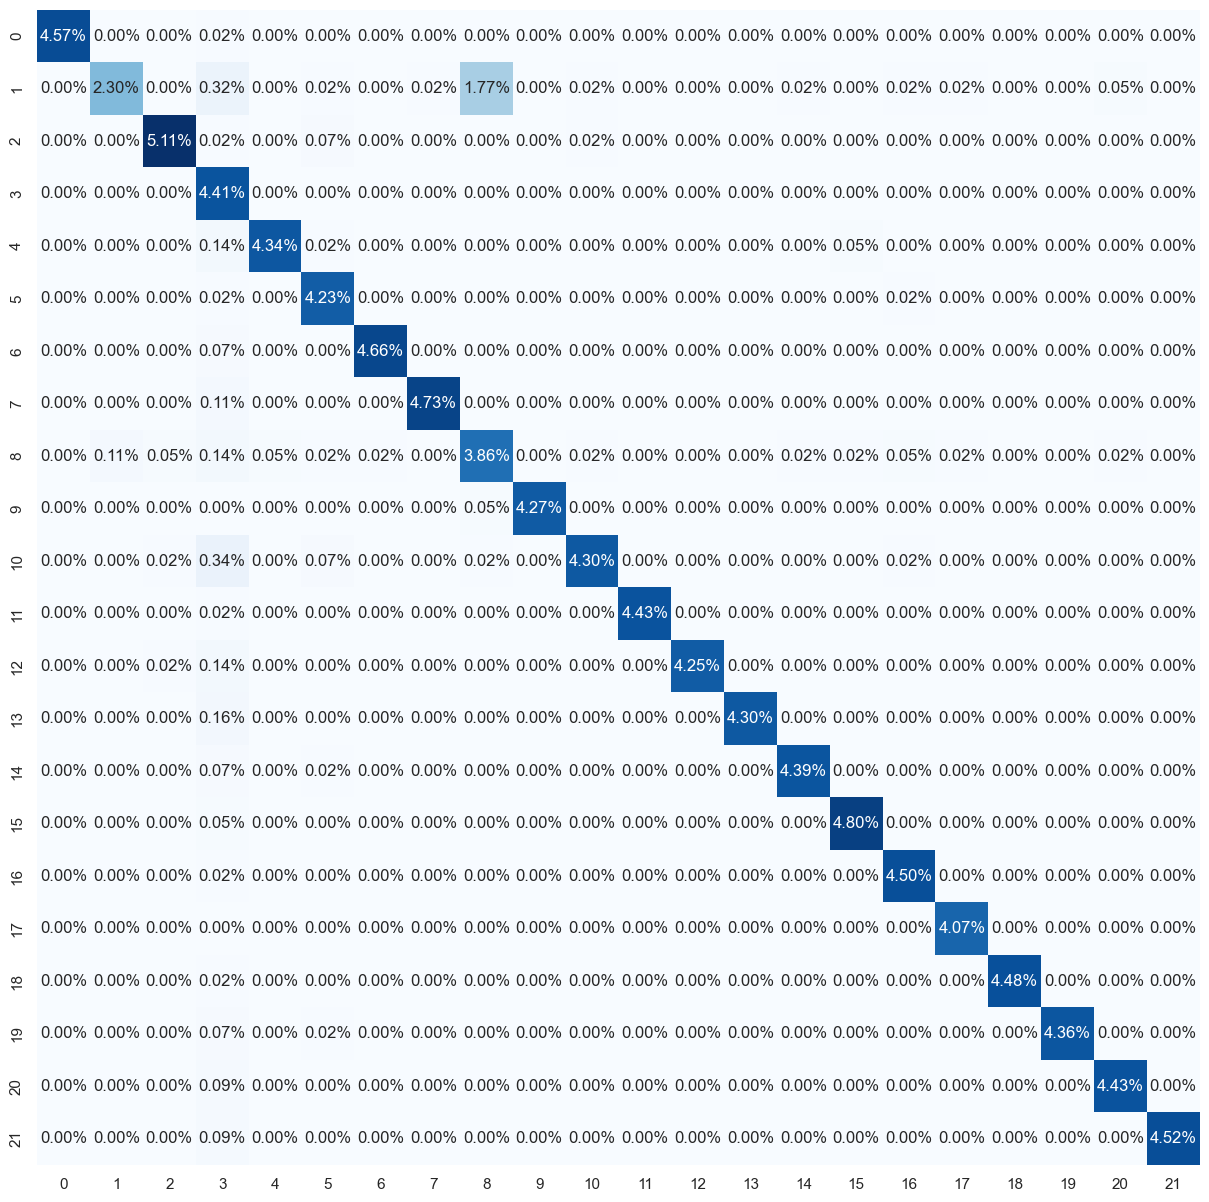

In [315]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

### Evaluating all kinds of evaluating parameters. 

In [316]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is MultiNomial Naive Bayes")
  
r_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is {}".format(r_acc))
  
prec = precision_score(y_test, y_predicted,average='micro')
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_predicted,average='micro')
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, y_predicted,average='micro')
print("The F1-Score is {}".format(f1))
 
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)  

The model used is MultiNomial Naive Bayes

The accuracy is 0.9529545454545455
The precision is 0.9529545454545455
The recall is 0.9529545454545455
The F1-Score is 0.9529545454545455
Classification Report is:

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       202
     Chinese       0.95      0.50      0.66       201
       Dutch       0.98      0.98      0.98       230
     English       0.70      1.00      0.82       194
    Estonian       0.99      0.95      0.97       200
      French       0.94      0.99      0.97       188
       Hindi       1.00      0.99      0.99       208
  Indonesian       1.00      0.98      0.99       213
    Japanese       0.68      0.88      0.76       194
      Korean       1.00      0.99      0.99       190
       Latin       0.98      0.90      0.94       210
     Persian       1.00      0.99      1.00       196
   Portugese       1.00      0.96      0.98       194
      Pushto       1.00      0.96 

# Insight: -

In [317]:
cal_metric=pd.DataFrame([l_acc,k_acc,r_acc],columns=["Score in percentage"])
cal_metric.index=['Bernoulli Naive Bayes',
                  'LinearSVC',
                  'Multinomial Naive Bayes']
cal_metric

,Score in percentage
Bernoulli Naive Bayes,0.896818
LinearSVC,0.957273
Multinomial Naive Bayes,0.952955



- As you can see with our MultinomialNB Model(95.29%) we are getting a better result even for the recall (0.86 or 86%) which is the most tricky part.
- So we gonna save our model with MultinomialNB Model

# Step 4: Save Model
**Goal:- In this step we are going to save our model in pickel format file.**

In [318]:
import pickle
pickle.dump(model , open('Language_Detection_BernoulliNB.pkl', 'wb'))
pickle.dump(classifier , open('Language_Detection_LinearSVC.pkl', 'wb'))
pickle.dump(clas , open('Language_Detection_MultinomialNB.pkl', 'wb'))

In [319]:
import pickle

def model_prediction(features):
    features = count_vec.transform([features]).toarray()
    pickled_model = pickle.load(open('C:/My Sample Notebook/Notebook Template/Language Detection/model/Language_Detection_MultinomialNB.pkl', 'rb'))
    Language = str(list(pickled_model.predict(features)))
    
    return str(f'The Language is {Language}')



#### We can test our model by giving our own parameters or features to predict. 

In [322]:
text = "नमस्ते मेरा नाम है"

In [323]:
model_prediction(text)

"The Language is ['Hindi']"

# Step 5: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API refrence. 

https://tinyurl.com/bdexnk6v

# Conclusion

After observing the problem statement we have build an efficient model to overcome it. The above model helps in the language based on text. The accuracy for the prediction is 95.29%  and it signifies the accurate prediction of the language.  